<a href="https://colab.research.google.com/github/manashpratim/Urban-Sound-Classification/blob/master/Urban_Sound_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Downloading the Datasets
!wget --no-check-certificate \
      "https://datahack-prod.s3.amazonaws.com/train_file/train_fuSp8nd.csv"\
      -O "/tmp/train.csv"

!wget --no-check-certificate \
      "https://datahack-prod.s3.amazonaws.com/test_file/test_B0QdNpj.csv"\
      -O "/tmp/test.csv"

--2019-07-12 05:15:05--  https://datahack-prod.s3.amazonaws.com/train_file/train_fuSp8nd.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.62.20
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.62.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94844 (93K) [text/csv]
Saving to: ‘/tmp/train.csv’

/tmp/train.csv      100%[===================>]  92.62K   197KB/s    in 0.5s    

2019-07-12 05:15:07 (197 KB/s) - ‘/tmp/train.csv’ saved [94844/94844]

--2019-07-12 05:15:09--  https://datahack-prod.s3.amazonaws.com/test_file/test_B0QdNpj.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.62.48
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.62.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19402 (19K) [text/csv]
Saving to: ‘/tmp/test.csv’

/tmp/test.csv       100%[===================>]  18.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#I have downloaded the data to my Google Drive. Unzipping the train and test folders containing the audio
import os
import zipfile

local_zip='/content/drive/My Drive/dataset/train.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/train')
zip_ref.close()


local_zip='/content/drive/My Drive/dataset/test.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/test')
zip_ref.close()


In [0]:
#Importing the csv files that contains the labels of the sounds
import pandas as pd
train=pd.read_csv('/tmp/train.csv')
test=pd.read_csv('/tmp/test.csv')

In [5]:
train.tail(5)

,ID,Class
5430,8725,engine_idling
5431,8726,dog_bark
5432,8727,engine_idling
5433,8728,engine_idling
5434,8729,air_conditioner


Class Distribution:
 jackhammer          668
engine_idling       624
siren               607
children_playing    600
drilling            600
street_music        600
air_conditioner     600
dog_bark            600
car_horn            306
gun_shot            230
Name: Class, dtype: int64


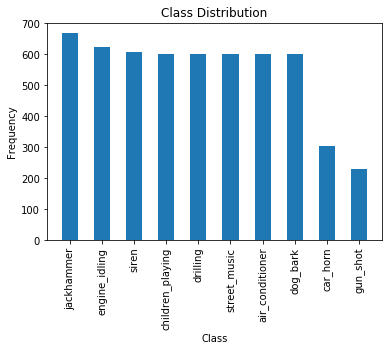

In [6]:
#Class Distribution
train['Class'].value_counts()
import numpy as np
import matplotlib.pyplot as plt
plt.bar(train['Class'].value_counts().index, train['Class'].value_counts(), width=0.5, bottom=None, align='center', data=train)
plt.title('Class Distribution')
plt.xticks(rotation='vertical')
plt.xlabel('Class')
plt.ylabel('Frequency')
print('Class Distribution:\n',train['Class'].value_counts())

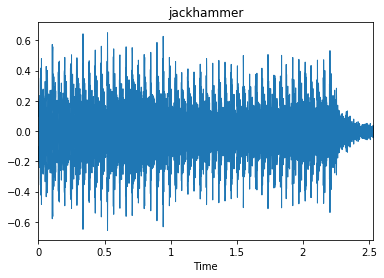

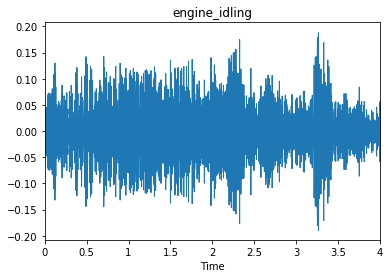

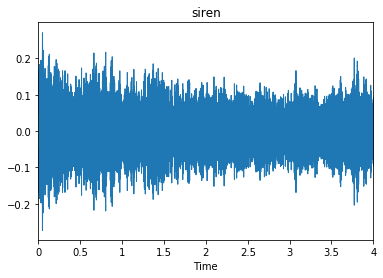

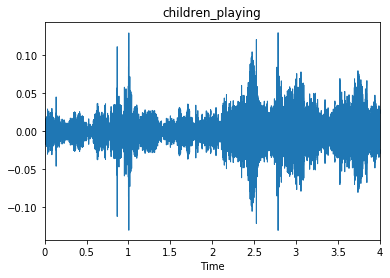

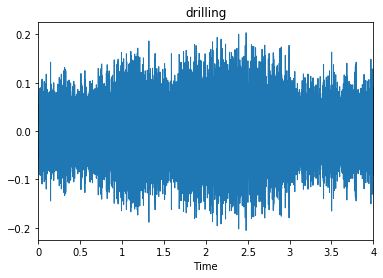

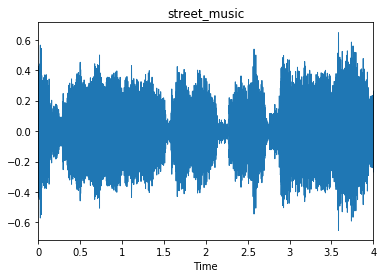

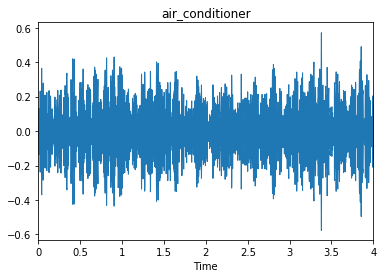

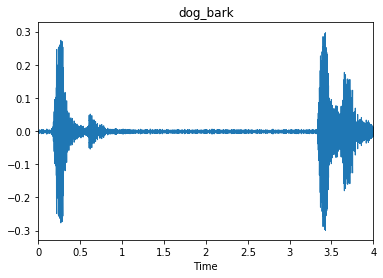

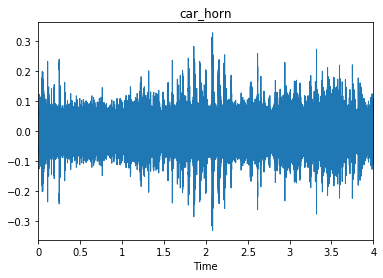

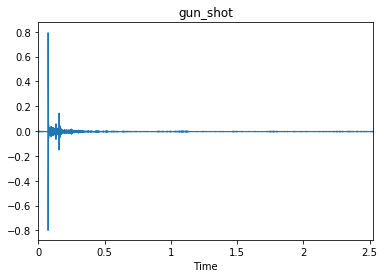

In [40]:
#Let's visualize the sound files of different classes
Classes=['jackhammer','engine_idling','siren','children_playing','drilling','street_music','air_conditioner','dog_bark','car_horn','gun_shot']
 
def get_index(c): #function to randomize the index of the classes
  return random.choice(train.loc[train.Class==c].index)

for i in range(0,10):
  j=get_index(Classes[i])
  x, sr = librosa.load('/tmp/train/Train/' + str(train.ID[j]) + '.wav')

  plt.figure(figsize=(6, 4))
  librosa.display.waveplot(x, sr=sr)
  plt.title(train.Class[j])
  sp.axis('Off')
  plt.pause(0.05)


  
plt.show()